In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 1) 티커와 기간 선택 (예: AAPL, 5년)
ticker = "AAPL"
df = yf.download(ticker, period="5y", auto_adjust=True)  # 배당/분할 보정 종가
# 컬럼: Open, High, Low, Close, Volume

# 2) 기본 확인
print(df.tail())
print(df.isna().sum())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-09-09  234.350006  238.779999  233.360001  237.000000  66313900
2025-09-10  226.789993  232.419998  225.949997  232.190002  83440800
2025-09-11  230.029999  230.449997  226.649994  226.880005  50208600
2025-09-12  234.070007  234.509995  229.020004  229.220001  55824200
2025-09-15  236.699997  238.190002  235.029999  237.000000  42583729
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


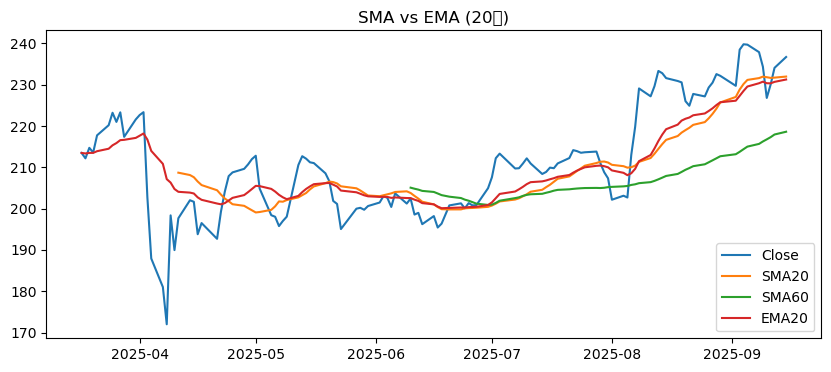

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 가져오기
df = yf.download("AAPL", period="6mo", auto_adjust=True)

# SMA & EMA 계산
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA60"] = df["Close"].rolling(window=60).mean()
df["EMA20"] = df["Close"].ewm(span=20, adjust=False).mean()

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["SMA20"], label="SMA20")
plt.plot(df.index, df["SMA60"], label="SMA60")
plt.plot(df.index, df["EMA20"], label="EMA20")
plt.legend(); plt.title("SMA vs EMA (20일)")
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


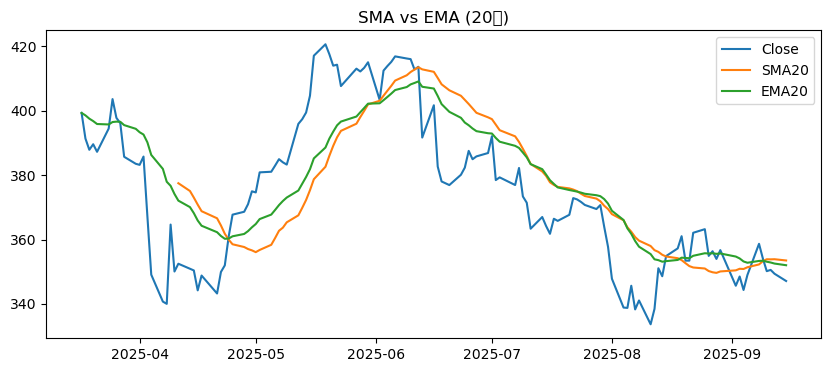

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 가져오기
df = yf.download("ADBE", period="6mo", auto_adjust=True)

# SMA & EMA 계산
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["EMA20"] = df["Close"].ewm(span=20, adjust=False).mean()

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["SMA20"], label="SMA20")
plt.plot(df.index, df["EMA20"], label="EMA20")
plt.legend(); plt.title("SMA vs EMA (20일)")
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Ticker          AAPL
Date                
2025-03-17       NaN
2025-03-18 -1.306793
2025-03-19  2.543762
2025-03-20 -1.137207
2025-03-21  4.159821
...              ...
2025-09-09 -3.529999
2025-09-10 -7.560013
2025-09-11  3.240005
2025-09-12  4.040009
2025-09-15  2.629990

[126 rows x 1 columns]
gain
Ticker          AAPL
Date                
2025-03-17       NaN
2025-03-18  0.000000
2025-03-19  2.543762
2025-03-20  0.000000
2025-03-21  4.159821
...              ...
2025-09-09  0.000000
2025-09-10  0.000000
2025-09-11  3.240005
2025-09-12  4.040009
2025-09-15  2.629990

[126 rows x 1 columns]
loss
Ticker          AAPL
Date                
2025-03-17       NaN
2025-03-18  1.306793
2025-03-19 -0.000000
2025-03-20  1.137207
2025-03-21 -0.000000
...              ...
2025-09-09  3.529999
2025-09-10  7.560013
2025-09-11 -0.000000
2025-09-12 -0.000000
2025-09-15 -0.000000

[126 rows x 1 columns]
Ticker          AAPL
Date                
2025-03-17       NaN
2025-03-18       NaN
2025-03-19     

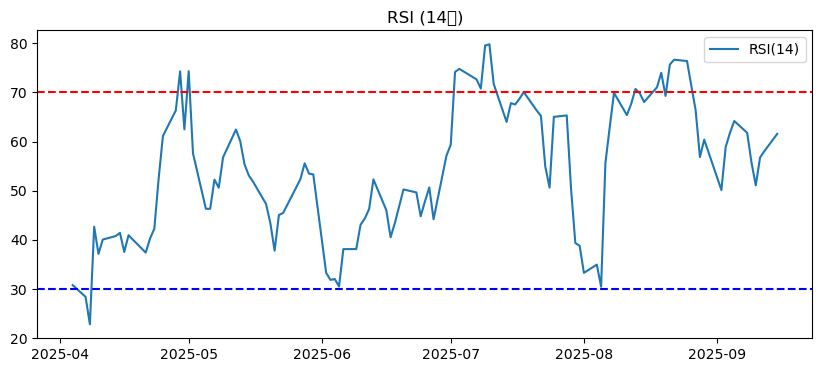

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download("AAPL", period="6mo", auto_adjust=True)

# RSI 함수
def RSI(series, n=14):
    delta = series.diff()
    print(delta)
    gain = delta.clip(lower=0)
    print("gain")
    print(gain)
    loss = -delta.clip(upper=0)
    print("loss")
    print(loss)

    avg_gain = gain.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()
    print(avg_gain)
    print(avg_loss)
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 계산
df["RSI14"] = RSI(df["Close"], 14)

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["RSI14"], label="RSI(14)")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="blue", linestyle="--")
plt.legend(); plt.title("RSI (14일)")
plt.show()


[*********************100%***********************]  1 of 1 completed


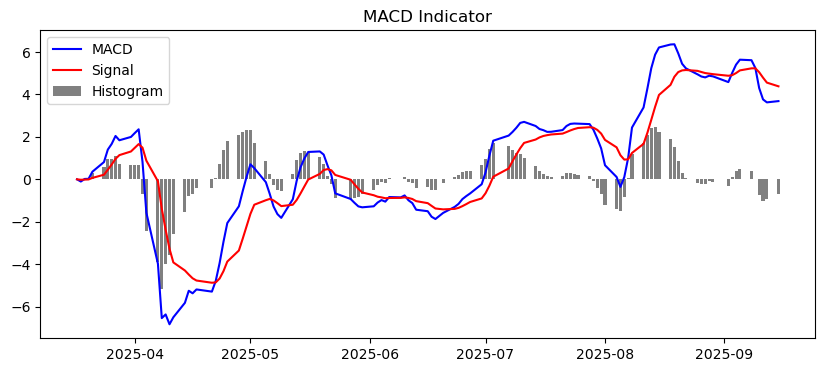

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("AAPL", period="6mo", auto_adjust=True)

# EMA 함수
def EMA(series, n):
    return series.ewm(span=n, adjust=False).mean()

# MACD 계산
df["EMA12"] = EMA(df["Close"], 12)
df["EMA26"] = EMA(df["Close"], 26)
df["MACD"] = df["EMA12"] - df["EMA26"]
df["Signal"] = EMA(df["MACD"], 9)
df["Hist"] = df["MACD"] - df["Signal"]

# 시각화
plt.figure(figsize=(10,4))
# plt.plot(df.index, df["Close"], label="price", color="green")

plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["Signal"], label="Signal", color="red")
plt.bar(df.index, df["Hist"], label="Histogram", color="gray")
plt.legend(); plt.title("MACD Indicator")
plt.show()
